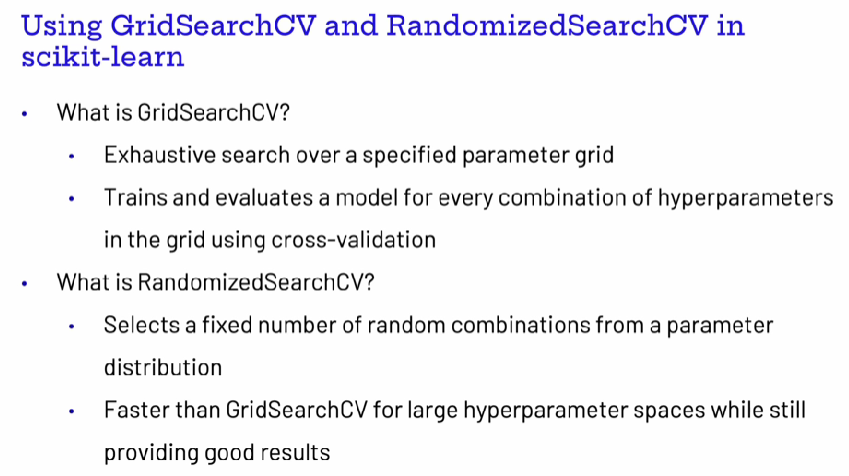
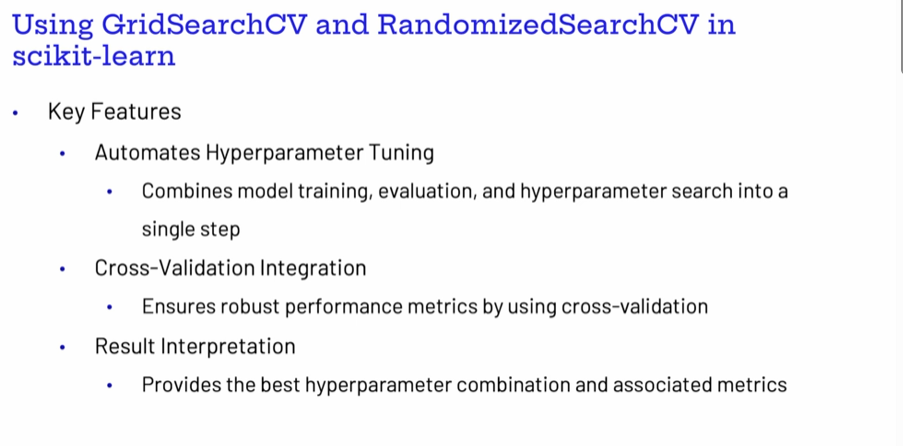
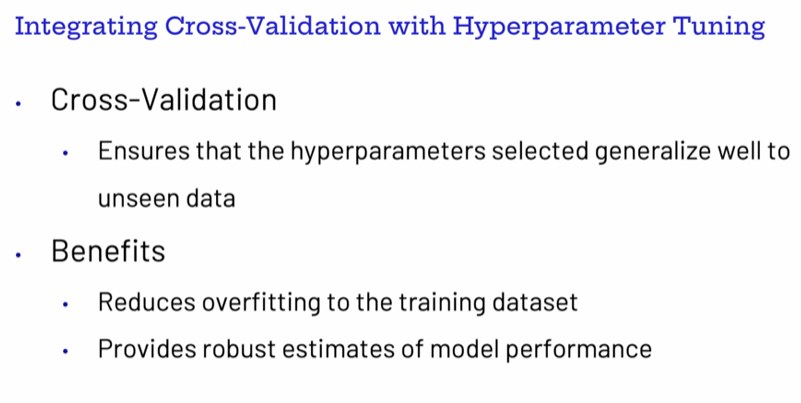
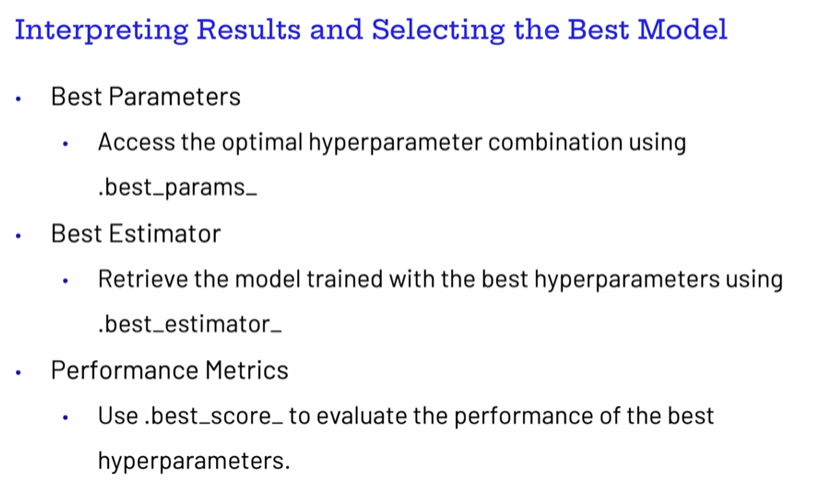

In [17]:
import numpy as np   
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC



In [5]:
data = load_iris()
x,y = data.data , data.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [10]:
param_grid = {
    'n_estimators':[50,100,150],
    'learning_rate':[0.01, 0.1, 0.2],
    'max_depth':[3,5,7]
}
grid_search =GridSearchCV (
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [12]:
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("best param: ", best_params_grid)
print("best scores: ", best_score_grid)

best param:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
best scores:  0.95


In [13]:
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(x_test)

In [16]:
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"test accuracy(grid cv): {accuracy_grid:.4f}")
print(f"Classification report: {classification_report(y_test,y_pred_grid)} ")

test accuracy(grid cv): 1.0000
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 


In [18]:
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale','auto']
}

In [19]:
# randomized search cv
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)

best_param_random = random_search.best_params_
best_score_random = random_search.best_score_

In [20]:
best_param_random

{'kernel': 'poly', 'gamma': 'auto', 'C': np.float64(0.021544346900318832)}

In [21]:
best_score_random

np.float64(0.9583333333333334)

In [22]:
print(accuracy_score(y_test,random_search.predict(x_test)))

0.9666666666666667
